#Modelo `K-Means`

O algoritmo de agrupamento `K-Means` é uma técnica de aprendizado de máquina não supervisionado capaz de formar grupos (clusters) de dados com base na similaridade entre as instâncias de um conjunto de dados multidimensional não rotulado. É uma técnica muito conhecida, popular por sua simplicidade e amplamente utilizada na comunidade científica. 

<p align=center>
  <img src="https://miro.medium.com/max/2160/1*tWaaZX75oumVwBMcKN-eHA.png" width="500px">
</p>

O objetivo do `K-Means` é agrupar as observações em um número, **K**, pré-especificado de grupos distintos e não sobrepostos. Para realizar o agrupamento é necessário, inicialmente, definir o número **K** em que o algoritmo dividirá o conjunto.

Para entender o funcionamento do algoritmo `K-Means` vamos seguir os seguintes passos:

1. Importação das bibliotecas Python;
2. Geração do conjunto de dados sintéticos;
3. Análise/visualização gráfica dos dados (se possível);
4. Execução do modelo `K-Means`;
5. Verificação dos resultados; 


##Importação das bibliotecas Python

Nesse exemplo, utilizaremos mais uma vez a linguagem de programação Python. Para execução das tarefas relacionadas a algoritmos de aprendizado de máquina exitem várias bibliotecas em Python que facilitam o desenvolvimento de aplicações em *machine learning*.

Entre as inúmeras bibliotecas disponíveis, destacam-se:

1.   [**Pandas**](https://pandas.pydata.org/): Biblioteca Python para manipulação e análise de dados. Oferece estruturas e operações para manipular tabelas e séries temporais. É um software livre com licença tipo BSD.
2.   [**Matplotlib**](https://matplotlib.org/): Biblioteca Python para visualização de dados, também é distibuída com licença de software tipo BSD.
3.   [**Numpy**](https://numpy.org/): Biblioteca Python com licença tipo BDS para manipulação de arrays e matrizes. É uma ferramenta extremamente útil para trabalhar a base de dados.
4. [**Seaborn**](https://github.com/mwaskom/seaborn): É uma biblioteca Python também com licença tipo BSD utilizada para visualização de dados em alto nível. Trabalha com a biblioteca **Matplotlib** e possui integração com as estruturas da biblioteca **Pandas**.
5. [**Scikit-learn**](https://scikit-learn.org/stable/): Trata-se de uma biblioteca de aprendizado de máquina escrita em Pyton, possui licença licença tipo BSD e inclui vários algoritmos de classificação, regressão e agrupamento. É uma das bibliotecas mais utilizadas no desenvovimento de algoritmos de aprendizado de máquina.


In [ ]:
#Importanto as bibliotecas Python necessarias ao experimento
#Manipulacao matricial e visualizacao grafica
#--------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#--------------------------------------------------
#Processamento dos dados
#--------------------------------------------------
from sklearn.datasets.samples_generator import make_blobs
#--------------------------------------------------
#Carregando o modelo K-Means da biblioteca Scikit-learn
#--------------------------------------------------
from sklearn.cluster import KMeans
#Carregando módulo para ignorar mensagens de Warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

localDataEndereco = "/content/breast-cancer-wisconsin.csv" 
df = pd.read_csv(localDataEndereco)


In [213]:
# Separando os dados em entrada e saida desejada e removendo as colunas `diagnosis` e `id`
dados = df.drop(['diagnosis', 'id'], axis=1)
dadosNaoRotulados = df[['radius_mean', 'texture_mean', 'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']]
#dados = df[['radius_mean', 'texture_mean']]
#print(dadosNaoRotulados)
print(dadosNaoRotulados)
print(dados)

     radius_mean  texture_mean  ...  concavity_worst  concave points_worst
0          9.029         17.33  ...            1.252               175.000
1         12.780         16.49  ...            1.039                 5.882
2         18.940         21.31  ...            2.687                 1.789
3          8.888         14.64  ...            1.434                 4.786
4         17.200         24.52  ...            6.566                 1.899
..           ...           ...  ...              ...                   ...
564        9.173         13.86  ...            1.397                 5.087
565       12.680         23.84  ...            4.024                 1.716
566       14.780         23.94  ...            3.024                 1.614
567        9.465         21.01  ...            9.412                 6.517
568       11.310         19.04  ...            1.444                 6.961

[569 rows x 11 columns]
     radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_wors

Benignos :  357
Malignos :  212
---------------------
Proporção de Benignos:  62.74165202108963
Proporção de Malignos:  37.25834797891037


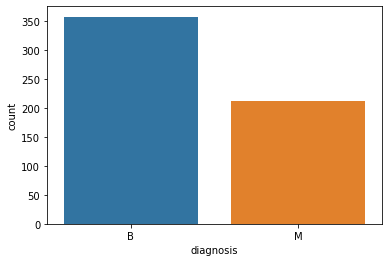

In [214]:
# Identificacao grafica da distribuicao das instancias
sns.countplot(df['diagnosis'],label="Count")

B, M = df['diagnosis'].value_counts()
print('Benignos : ',B)
print('Malignos : ',M)
print('---------------------')
print('Proporção de Benignos: ', 100*B/(B+M))
print('Proporção de Malignos: ', 100*M/(B+M))

##Gerando um conjunto de dados de sintético em Python

Para demonstrar o uso do algoritmo `K-Means` do pacote Scikit-learn é necessário utilizar um conjunto de dados não rotulado. Existem diversas formas de criar uma nuvem de pontos no espaço R<sup>n</sup> utilizando a linguagem Python.

No exemplo em estudo, será utilizado um pacote da biblioteca `Scikit-learn` para gerar um conjunto sintético de 200 instâncias no espaço R<sup>3</sup>. 

Adotamos o espaço R<sup>3</sup> devido a possibildiade de visualização de um conjunto de dados tridimensional.


In [215]:
'''#Utilizando a funcao makeblobs para gerar o conjunto tridimensional de 200 instancias
dadosNaoRotulados, rotuloClusterDados = make_blobs(n_samples=569, n_features=30, 
                       cluster_std=0.80, centers=2);
print(dadosNaoRotulados)
print(rotuloClusterDados)'''

'#Utilizando a funcao makeblobs para gerar o conjunto tridimensional de 200 instancias\ndadosNaoRotulados, rotuloClusterDados = make_blobs(n_samples=569, n_features=30, \n                       cluster_std=0.80, centers=2);\nprint(dadosNaoRotulados)\nprint(rotuloClusterDados)'

## Análise/visualização gráfica dos dados

A análise visual dos dados, sempre que possível, é uma ferramenta interessante para que o analista consiga obter informações relevantes sobre a distribuição e comportamento dos dados no espaço.

Em nosso exemplo os dados foram intencionalmente gerados no espaço tridimensional para proporcionar a visualização dos pontos no espaço R<sup>3</sup>.

In [216]:
'''#Utilizando o pacote Matplotlib para gerar a visualizacao grafica dos dados e verificar o comportamento dos dados sinteticos no espaco
grafico3d = plt.axes(projection='3d')
grafico3d.scatter3D(dadosNaoRotulados[:, 0], dadosNaoRotulados[:, 1], dadosNaoRotulados[:, 2])'''

"#Utilizando o pacote Matplotlib para gerar a visualizacao grafica dos dados e verificar o comportamento dos dados sinteticos no espaco\ngrafico3d = plt.axes(projection='3d')\ngrafico3d.scatter3D(dadosNaoRotulados[:, 0], dadosNaoRotulados[:, 1], dadosNaoRotulados[:, 2])"

##Execução do modelo K-Means

Como descrito anteriormente, o `K-Means` foi o modelo selecionado para estudar o problema de agrupamento de dados não rotulados.

Na literatura, existem diversos modelos que poderiam ser utilizados para a mesma finalidade (Ex: ***Fuzzy C-Means, Mapas de Kohonen, Clusters Hierárquicos, entre outros***). O `K-Means`foi escolhido devido a sua facilidade de entendimento e por ser amplamente utilizado na comunidade científica. 

É importante destacar que mesmo sendo um modelo com baixo grau de complexidade, o `K-Means` apresenta resultados interessantes para grande parte dos problemas de agrupamento de dados não rotulados no qual ele é aplicado.

O `K-Means` será executado na versão implementada na biblioteca `Scikit-learn` através da função `KMeans`. Para ter acesso a todos os hiperparâmetros do modelo `K-Means` consulte o [manual do modelo](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) no portal do `Scikit-learn`.

In [225]:
#Criando uma instancia do K-Means para a divisao dos dados sinteticos em 4 clusters
kmeans = KMeans(n_clusters=2)
#Atribuindo os dados sinteticos, gerados anteriormente a instancia do K-Means e ajustando o modelo para localicar as centroides
kmeans.fit(dadosNaoRotulados)
#Calculando os clusters para os dados nao rotulados e atribuindo os centros em uma nova variavel
saidaRotulos_kmeans = kmeans.predict(dadosNaoRotulados)
centers = kmeans.cluster_centers_

##Verificação dos resultados

Após o cálculo dos centros e a obtenção dos rótulos é possível avaliar os resutlados do algoritmo `K-Means`. Existem várias formas de avaliar o desempenho do modelo.

No exemplo em análise os resultados serão exibidos por meio da impressão dos rótulos atribuidos aos dados e também através da análise gráfica dos clusters formados após a obtenção dos grupos.


In [226]:
#Impressao dos rotulos atribuidos pelo K-Means aos dados não rotulados
cont0 = 0
cont1 = 0
for i in range(569):
  if (saidaRotulos_kmeans[i]==0):
    cont0 = cont0 + 1
  else: 
    cont1 = cont1 + 1


print("Beligno: ",cont0)
print("Maligno: ",cont1)
print(saidaRotulos_kmeans)
#Utilizando as bibliotecas Python para visualisar os clusters formados nos dados sinteticos
'''graficoResultado3d = plt.axes(projection='3d')
graficoResultado3d.scatter3D(dadosNaoRotulados[:, 0], dadosNaoRotulados[:, 1], dadosNaoRotulados[:, 2], c=saidaRotulos_kmeans, s=50, cmap='viridis',alpha=0.2)
graficoResultado3d.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2],c='black', s=569, alpha=1)'''

Beligno:  438
Maligno:  131
[0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0

"graficoResultado3d = plt.axes(projection='3d')\ngraficoResultado3d.scatter3D(dadosNaoRotulados[:, 0], dadosNaoRotulados[:, 1], dadosNaoRotulados[:, 2], c=saidaRotulos_kmeans, s=50, cmap='viridis',alpha=0.2)\ngraficoResultado3d.scatter3D(centers[:, 0], centers[:, 1], centers[:, 2],c='black', s=569, alpha=1)"

## Considerações

Observando os grupos formados pelo algoritmo `K-Means` é possível inferir que valores os grupos formados foram capazes de dividir adequadamente os dados sintéticos gerados. 

Vale ressaltar que os dados sintéticos obtidos por meio da função `samples_generator` do Python foram criados com uma certa separação inicial (que pôde ser verificada visualmente no primeiro gráfico). Essa separação dos dados facilitou o processo de obtenção dos grupos pelo algoritmo `K-Means`.

Em linhas gerais, os grupos obtidos para esse conjunto de dados sintéticos atendeu adequadamente os objetivos desse estudo de dados. Lembrando que o resultado do `K-Means` varia de acordo com cada tipo de problema em análise.

Espero que você tenha compreendido as explicações.
Desejo um ótimo estudo para você.